# Recommendation system using collaborative filtering

In [140]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats.stats import pearsonr
import seaborn as sns


In [141]:
#Define the dictionary
movie_user_preferences={'Jill': {'Avenger: Age of Ultron': 7.0,
 'Django Unchained': 6.5,
 'Gone Girl': 9.0,
 'Kill the Messenger': 8.0},
'Julia': {'Avenger: Age of Ultron': 10.0,
 'Django Unchained': 6.0,
 'Gone Girl': 6.5,
 'Kill the Messenger': 6.0,
 'Zoolander': 6.5},
'Max': {'Avenger: Age of Ultron': 7.0,
 'Django Unchained': 7.0,
 'Gone Girl': 10.0,
 'Horrible Bosses 2': 6.0,
 'Kill the Messenger': 5.0,
 'Zoolander': 10.0},
'Robert': {'Avenger: Age of Ultron': 8.0,
 'Django Unchained': 7.0,
 'Horrible Bosses 2': 5.0,
 'Kill the Messenger': 9.0,
 'Zoolander': 9.0},
'Sam': {'Avenger: Age of Ultron': 10.0,
 'Django Unchained': 7.5,
 'Gone Girl': 6.0,
 'Horrible Bosses 2': 3.0,
 'Kill the Messenger': 5.5,
 'Zoolander': 7.0},
'Toby': {'Avenger: Age of Ultron': 8.5,
 'Django Unchained': 9.0,
 'Zoolander': 2.0},
'William': {'Avenger: Age of Ultron': 6.0,
 'Django Unchained': 8.0,
 'Gone Girl': 7.0,
 'Horrible Bosses 2': 4.0,
 'Kill the Messenger': 6.5,
 'Zoolander': 4.0}}



## Recommendations using user based collaborative filtering

## Euclidean Distance

In [142]:
#Create a dataframe
data=[]
for i in movie_user_preferences.keys(): 
    try:
        data.append( (i, 
                     movie_user_preferences[i]['Django Unchained'], 
                     movie_user_preferences[i]['Avenger: Age of Ultron']) ) 
    except:
        pass
    
df = pd.DataFrame(data=data, columns=['user','django','avenger'])
df

,user,django,avenger
0,Jill,6.5,7.0
1,Julia,6.0,10.0
2,Max,7.0,7.0
3,Robert,7.0,8.0
4,Sam,7.5,10.0
5,Toby,9.0,8.5
6,William,8.0,6.0


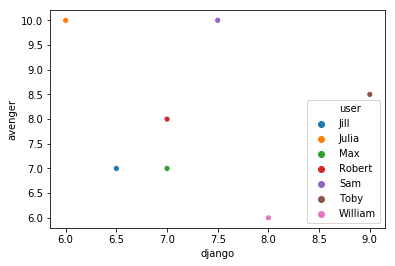

In [143]:
#Compare the ratings for movies
sns.scatterplot(x='django', y= 'avenger', data=df, hue=df.user)

In [144]:
#Euclidean distance between Jill and Toby
sqrt(pow(8.5-7,2)+pow(9.0-6.5,2))

2.9154759474226504

In [145]:
#Euclidan distance between Jill and Max
sqrt(pow(8.0-7.0,2)+pow(7-7,2))

1.0

In [146]:
#Returns a distance based similarity score
def similarity_function(prefs, person1, person2):
    sum_of_squares = sum([pow(prefs[person1][item] - prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    return (1/(1+sum_of_squares))

In [147]:
#Examine the similarity score
print(similarity_function(movie_user_preferences, 'Toby', 'Sam'))

0.03278688524590164


## Pearson Correlation

In [148]:
#Creating a dataset comparing the scores of users
def pearson_data(prefs, person1, person2):
    dat=[]
    for i in prefs[person1].keys():
        if i in prefs[person2].keys():
            dat.append( (i, prefs[person1][i], prefs[person2][i]))
    dat=pd.DataFrame(data=dat, columns=['movie', person1, person2])
    return dat

In [149]:
#Examine the dataset
dat = pearson_data(movie_user_preferences, 'Jill','William')
dat.head()

,movie,Jill,William
0,Avenger: Age of Ultron,7.0,6.0
1,Django Unchained,6.5,8.0
2,Gone Girl,9.0,7.0
3,Kill the Messenger,8.0,6.5


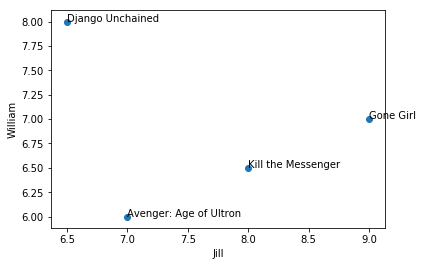

In [150]:
#Scatter plot of the scores
plt.scatter(dat.Jill, dat.William)
plt.xlabel('Jill')
plt.ylabel('William')
for i, txt in enumerate(dat.movie):
    plt.annotate(txt, (dat['Jill'][i], dat['William'][i]))
plt.show()

In [151]:
#Computing the pearson's score
pearsonr(dat.Jill, dat.William)

(-0.24206536647461385, 0.7579346335253856)

The first value represents the correlation coefficient, here we have a -0.24 which indicates that the two users have a weak negative correlation. The second value is the p-value which represents the probablity that the data would have arisen if the null hypothesis was true ( the null hypothesis being that the data is uncorrelated)

In [152]:
#Function that returns the Pearson correlation
def pearson_sim(prefs, p1, p2):
    si={}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item]=1
    n=len(si)
    
    #Add the preferences
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    
    #sum of squares
    sum1sq = sum([pow(prefs[p1][it],2) for it in si])
    sum2sq = sum([pow(prefs[p2][it],2) for it in si])
    
    #sum up the products
    psum = sum([prefs[p1][it]*prefs[p2][it] for it in si])
    
    #Pearson score calculation
    num = psum -(sum1*sum2/n)
    den =sqrt((sum1sq-pow(sum1,2)/n)*(sum2sq-pow(sum2,2)/n))
    if den==0: return 0
    r=num/den
    return r
    

In [153]:
#Computing the pearson's score
pearson_sim(movie_user_preferences, 'Sam', 'Julia')

0.8828518332602507

In [154]:
#define the pearson correlation score function
def pearson_r(prefs, p1, p2):
    return pearsonr(prefs[p1], prefs[p2])

In [155]:
#define the function to get top matches
def top_matches(prefs, person, n=5, similarity =pearson_sim):
    score =[(similarity(prefs, person, other), other) for other in prefs if other!=person]
    score.sort()
    score.reverse()
    return score[0:n]

In [156]:
#Examine the output
top_matches(movie_user_preferences, 'Toby', n=3,similarity =similarity_function)

[(0.10526315789473684, 'Jill'),
 (0.08163265306122448, 'William'),
 (0.03278688524590164, 'Sam')]

In [157]:
#Define the final recommendations function
def get_recommendations(prefs, person, similarity=pearson_sim):
    totals={}
    simSums={}
    for other in prefs:
        if other==person: continue
        sim =similarity(prefs, person, other)
        if sim<=0: continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item]==0:
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                #sum of similarities
                simSums.setdefault(item,0)
                simSums[item]+=sim
    rankings =[(total/simSums[item],item) for item,total in totals.items()]
    rankings.sort()
    rankings.reverse()
    return rankings
                
                                                 
                                                 
        

In [158]:
#Examine the output
get_recommendations(movie_user_preferences, 'Toby')

[(6.587965809121004, 'Gone Girl'),
 (6.087965809121004, 'Kill the Messenger'),
 (3.608127720528246, 'Horrible Bosses 2')]

## Recommendations using item-based collaborative filtering

In [159]:
#Define the function to transform the orginal dictionary
def transform_prefs(prefs):
    result ={}
    for person in prefs:
        for item in prefs[person]:
            #if item is not in result then set it to {}( a dictionary)
            result.setdefault(item,{})
            
            #Flip the item and result
            result[item][person] = prefs[person][item]
    return result

In [160]:
#Examine the results
transform_prefs(movie_user_preferences)

{'Avenger: Age of Ultron': {'Jill': 7.0,
  'Julia': 10.0,
  'Max': 7.0,
  'Robert': 8.0,
  'Sam': 10.0,
  'Toby': 8.5,
  'William': 6.0},
 'Django Unchained': {'Jill': 6.5,
  'Julia': 6.0,
  'Max': 7.0,
  'Robert': 7.0,
  'Sam': 7.5,
  'Toby': 9.0,
  'William': 8.0},
 'Gone Girl': {'Jill': 9.0,
  'Julia': 6.5,
  'Max': 10.0,
  'Sam': 6.0,
  'William': 7.0},
 'Kill the Messenger': {'Jill': 8.0,
  'Julia': 6.0,
  'Max': 5.0,
  'Robert': 9.0,
  'Sam': 5.5,
  'William': 6.5},
 'Zoolander': {'Julia': 6.5,
  'Max': 10.0,
  'Robert': 9.0,
  'Sam': 7.0,
  'Toby': 2.0,
  'William': 4.0},
 'Horrible Bosses 2': {'Max': 6.0, 'Robert': 5.0, 'Sam': 3.0, 'William': 4.0}}

In [161]:
#define the function to calculate similarity score
def calculate_similar_items(prefs, n=10):
    result={}
    itemprefs = transform_prefs(prefs)
    c=0
    for item in itemprefs:
        c+=1
        if c%100==0: print("%d/%d" % (c,len(itemprefs)))
        scores = top_matches(itemprefs, item, n=n, similarity=similarity_function)
        result[item]=scores
    return result
    

In [162]:
# Examine the output
itemsim = calculate_similar_items(movie_user_preferences)
itemsim

{'Avenger: Age of Ultron': [(0.034782608695652174, 'Django Unchained'),
  (0.023121387283236993, 'Gone Girl'),
  (0.022988505747126436, 'Kill the Messenger'),
  (0.015625, 'Horrible Bosses 2'),
  (0.012738853503184714, 'Zoolander')],
 'Django Unchained': [(0.05714285714285714, 'Kill the Messenger'),
  (0.05063291139240506, 'Gone Girl'),
  (0.034782608695652174, 'Avenger: Age of Ultron'),
  (0.023668639053254437, 'Horrible Bosses 2'),
  (0.012578616352201259, 'Zoolander')],
 'Gone Girl': [(0.09090909090909091, 'Zoolander'),
  (0.05063291139240506, 'Django Unchained'),
  (0.036036036036036036, 'Kill the Messenger'),
  (0.02857142857142857, 'Horrible Bosses 2'),
  (0.023121387283236993, 'Avenger: Age of Ultron')],
 'Kill the Messenger': [(0.05714285714285714, 'Django Unchained'),
  (0.036036036036036036, 'Gone Girl'),
  (0.03278688524590164, 'Horrible Bosses 2'),
  (0.02877697841726619, 'Zoolander'),
  (0.022988505747126436, 'Avenger: Age of Ultron')],
 'Zoolander': [(0.09090909090909091,

In [163]:
#Define the function to make recommendations
def get_item_recommendations(prefs, itemmatch, user):
    userratings=prefs[user]
    scores={}
    totalsim={}

    for item, rating in userratings.items():
        for similarity, item2 in itemmatch[item]:
            if item2 in userratings: continue
            
            scores.setdefault(item2,0)
            scores[item2] += rating*similarity
            
            totalsim.setdefault(item2,0)
            totalsim[item2]+=similarity
    
    #Divide each score by the totalsim to get the average
    
    rankings=[(score/totalsim[item], item) for item,score in scores.items()]
    
    rankings.sort()
    rankings.reverse()
    return rankings

    
            
    

In [164]:
#Examine the output
rankings = get_item_recommendations(movie_user_preferences,itemsim, 'Toby')
rankings

[(7.044841200971884, 'Kill the Messenger'),
 (6.476296577225752, 'Horrible Bosses 2'),
 (5.0651585538275095, 'Gone Girl')]